<p>أولاً قمنا بتضمين المكاتب التي نحتاجها </p>
<ul style="direction:rtl">
    <li>csv : مكتبة للتعامل مع ملفات التي صيغتها csv</li>
    <li>re :مكتبة تحوي على عمليات و توابع للـ regular expressions </li>
    <li>pandas : مكتبة تحوي العديد من التوابع للتعامل مع الداتا و إظهارها بجداول</li>
    </ul>

In [113]:
import csv,re
import pandas as pd
pd.options.display.max_colwidth = 200

<p style="direction:rtl">انشئنا 3 Dataframes و ستحوي على التويتات الخاصة لكل عملية search , مثلا اول dataframe ستحوي التويتات المتعلقة ببرشلونة اما الثانية لريال مدريد و الثالثة لنتائج الكلاسيكو, تم قراءة كل ملف على حدى عبر تابع read_csv و باراميتراته هي إسم الملفو إستخدمنا الـ error_bad_lines للتخلص من الأسطر المعطوبة اي تحوي على تشويه و من ثم سمينا كل عمود بإسم مميز له</p>
<p style="direction:rtl">
    دمجنا كل DataFrame الى جدول موحد عبر تابع الـ concat و من ثم عملنا reset للـ index لأن عندما عملنا concat القيم المضافة جديدا كانت تحمل الـ index القديم لها و بذلك حدثنا الـ index  للجدول بأكمله و بتعليمة الـ sample قمنا بخلص الأسطر لدينا لحدوث بعض من العشوائية في محتوى الأسطر و خزنا الجدول كملف إيكسل
    </p>

In [114]:
df = pd.read_csv('tweetsBar.csv',error_bad_lines=False, names = ["Date", "Month", "Day", "Min","Sec","M-Sec","Tweet","Language"])
df2 = pd.read_csv('tweetsRM.csv',error_bad_lines=False, names = ["Date", "Month", "Day", "Min","Sec","M-Sec","Tweet","Language"])
df3 = pd.read_csv('tweetsCL.csv',error_bad_lines=False, names = ["Date", "Month", "Day", "Min","Sec","M-Sec","Tweet","Language"])

frames = [df, df2, df3]
tweets = pd.concat(frames)
tweets.reset_index(drop=True, inplace=True)
tweets = tweets.sample(frac=1).reset_index(drop=True)
tweets.to_excel("Twitter.xlsx")

<p style="direction:rtl">شكل الجدول لدينا</p>

In [115]:
tweets.head()

,Date,Month,Day,Min,Sec,M-Sec,Tweet,Language
0,|[datetime.datetime(2018,11,14,0,21,56)]|,['انا عارف ان الراجل دا مستحيل ييجي عندنا فمقداميش غير اني ادعي ان ربنا يعمي ادارة برشلونة عنه مش اكتر https://t.co/e6NGFHc9tX'],['ar']
1,|[datetime.datetime(2018,11,14,3,11,9)]|,['@MuttarALR زامبروتا ما قدم ربع مستواه ايام اليوفي حتى في فترات كثيره جلس احتياط مع انه اكثر صفقه كنت انتظرها توقعت… https://t.co/YcMKgFlBUw'],['ar']
2,|[datetime.datetime(2018,11,14,0,26,30)]|,['الله يستر\n\nخريطة المطر اكبر من خريطة استحواذ برشلونه'],['ar']
3,|[datetime.datetime(2018,11,13,16,26,10)]|,['@FCBW_A7 و في الكلاسيكو مسوين يعنني متعصبين تفو عليك انت و راموس'],['ar']
4,|[datetime.datetime(2018,11,14,1,12,51)]|,"['RT @ZoYaZenat: رونثيرو : "" سولاري اثبت بانه ملتزم مع بيته ، و ريال مدريد قاموا بعمل جيد بمنحه سنة اضافية "" https://t.co/PAt59lC8E2']",['ar']


<p style="direction:rtl">
    نلاحظ ان لدينا اعمدة غير مهمة مثل اللغة و الدقائق الخ... , و التاريخ مقسم الى عدو اعمدة , لذلك قمنا اولاً بتوحيد اعمدة التاريخ الى عمود واحد و من ثم التخلص من الأعمدة الزائدة , ثالثاً قمنا بإنشاء عمود لتخزين إسم المستخدم و من ثم عملية لتخلص من الأسطر الخاطئة
</p>

In [116]:
for d in tweets['Date']:
    tweets['Date'] = re.sub(r'\|\[datetime.datetime\(2018','2018',d)
tweets['Date'] = tweets['Date'].map(str) +"\\"+ tweets['Month'].map(str) +"\\"+ tweets['Day'].map(str)
tweets = tweets.drop(['Month','Day','Min','Sec','M-Sec','Language'], axis=1)
tweets['Username'] = ' '
tweets = tweets[tweets.Tweet != '[\'ar\']']
tweets.reset_index(drop=True, inplace=True)

شكل الجدول بعد تطبيق العمليات السابقة 

In [117]:
tweets.head()

,Date,Tweet,Username
0,2018\11\14,['انا عارف ان الراجل دا مستحيل ييجي عندنا فمقداميش غير اني ادعي ان ربنا يعمي ادارة برشلونة عنه مش اكتر https://t.co/e6NGFHc9tX'],
1,2018\11\14,['@MuttarALR زامبروتا ما قدم ربع مستواه ايام اليوفي حتى في فترات كثيره جلس احتياط مع انه اكثر صفقه كنت انتظرها توقعت… https://t.co/YcMKgFlBUw'],
2,2018\11\14,['الله يستر\n\nخريطة المطر اكبر من خريطة استحواذ برشلونه'],
3,2018\11\13,['@FCBW_A7 و في الكلاسيكو مسوين يعنني متعصبين تفو عليك انت و راموس'],
4,2018\11\14,"['RT @ZoYaZenat: رونثيرو : "" سولاري اثبت بانه ملتزم مع بيته ، و ريال مدريد قاموا بعمل جيد بمنحه سنة اضافية "" https://t.co/PAt59lC8E2']",


<p style="direction:rtl">
نقوم بالبحث عن إسم المستخدم لإدخاله للعمود المخصص له و قد قمنا بذلك عن طريق إنشاء مصفوفة احادية تحوي على جميع التوكينز في النص عبر إنشاء اوبجكت من TweetTokenizer , إستخدمنا هذا النوع من الـ Tokenizers لانه مخصص للتويتر حيث سيقوم بالإنتاه على الكلمات التي ستحوي على الرموز @ و #, سنمرق على جميع التويتات و نبحث عن التوكن التي ستحوي @ في بدايتها  و سنقوم بإسناد القيمة في سطرها المخصص من عمود المستحدمين    
</p>

In [37]:
from nltk.tokenize import TweetTokenizer 

all_tokens = []
tw = TweetTokenizer()
for i in range(len(tweets)):
    for token in tw.tokenize(tweets['Tweet'][i]):
        if token[0] == '@':
            tweets['Username'][i] = token

عمود المستخدمين بعد تعبئته بالأسماء

In [38]:
tweets.head()

,Date,Tweet,Username
0,2018\11\14,['RT @khalil135246: عصير الالوفيرا .الصبار\nيعمل على تنظيف الجسم \nويعمل على تنشيط الدوره الدمويه\nويعالج الحموضه والتهاب المعدة \nويزيل الذهون ا…'],@khalil135246
1,2018\11\13,['RT @M10_G0AT: ميسي ملك الليغا👑\n-هداف الليغا التاريخي \n-الأكثر صناعه في تاريخ الليغا\n-هداف الكلاسيكو التاريخي\n-الأكثر صناعة في تاريخ الكلاسي…'],@M10_G0AT
2,2018\11\13,['RT @Almoj_alazra8: ليونيل ميسي :\nالكرة الذهبيه 5 مرات\nالحذاء الذهبي 5 مرات\nهداف برشلونه التاريخي\nهداف الليغا التاريخي\nهداف الارجنتين التاري…'],@Almoj_alazra8
3,2018\11\14,['RT @RMCFarab: ريفالدو ( لاعب برشلونه سابقاً ) : كان من المُفترض أن يكون فينيسيوس متاحاً في الفريق الأول مُنذ بداية الموسم . https://t.co/rK…'],@RMCFarab
4,2018\11\14,['RT @barcelonaHD: بوسكيتس عن هدف ميسى ضد ريال مدريد 🤣\nنصف نهائى دورى الأبطال 2011 https://t.co/QJpz36fcW7'],@barcelonaHD


<p style="direction:rtl">
    نلاحظ وجود إسم المستخدم في عمود التويت لذلك نقوم بحذفه عبر البحث عنه في السطر و إستبداله عن طريق تابع الـ replace
    </p>

In [40]:
all_tokens = []
tw = TweetTokenizer()
for i in range(len(tweets)):
    for token in tw.tokenize(tweets['Tweet'][i]):
        if token[0] == '@':
            tweets['Tweet'][i] = tweets['Tweet'][i].replace(token,'')

الجدول بعد حذف إسم المستخدم بعمود التويت

In [41]:
tweets.head()

,Date,Tweet,Username
0,2018\11\14,['RT : عصير الالوفيرا .الصبار\nيعمل على تنظيف الجسم \nويعمل على تنشيط الدوره الدمويه\nويعالج الحموضه والتهاب المعدة \nويزيل الذهون ا…'],@khalil135246
1,2018\11\13,['RT : ميسي ملك الليغا👑\n-هداف الليغا التاريخي \n-الأكثر صناعه في تاريخ الليغا\n-هداف الكلاسيكو التاريخي\n-الأكثر صناعة في تاريخ الكلاسي…'],@M10_G0AT
2,2018\11\13,['RT : ليونيل ميسي :\nالكرة الذهبيه 5 مرات\nالحذاء الذهبي 5 مرات\nهداف برشلونه التاريخي\nهداف الليغا التاريخي\nهداف الارجنتين التاري…'],@Almoj_alazra8
3,2018\11\14,['RT : ريفالدو ( لاعب برشلونه سابقاً ) : كان من المُفترض أن يكون فينيسيوس متاحاً في الفريق الأول مُنذ بداية الموسم . https://t.co/rK…'],@RMCFarab
4,2018\11\14,['RT : بوسكيتس عن هدف ميسى ضد ريال مدريد 🤣\nنصف نهائى دورى الأبطال 2011 https://t.co/QJpz36fcW7'],@barcelonaHD


<p style="direction:rtl">
    لا يزال علينا تنضيف و إزالة بعض المحارف في التويتات مثل الإيموجز و التعبيرات و علامات الارقيم و روابط الصور و المواقع , قمنا بذلك عبر تابع الـ re.sub لإستبدال كل ما سبق بفراغ
    </p>

In [46]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
for i in range(len(tweets)):
    tweets['Tweet'][i] = re.sub(r"https://.*/.*$",'',tweets['Tweet'][i]) #Delete links
    tweets['Tweet'][i] = emoji_pattern.sub(r'', tweets['Tweet'][i]) #Delete Emoji
    tweets['Tweet'][i] = re.sub(r"\\n",'',tweets['Tweet'][i]) # Delete \n
    tweets['Tweet'][i] = re.sub(r"RT",'',tweets['Tweet'][i]) # Delete RT
    tweets['Tweet'][i] = re.sub(r"\[\'",'',tweets['Tweet'][i]) # Delete ['
    tweets['Tweet'][i] = re.sub(r"\'\]",'',tweets['Tweet'][i]) # Delete ']
    

<p>
    التويتات بعد حذف الإضافات 
    </p>

In [48]:
tweets.head()

,Date,Tweet,Username
0,2018\11\14,: عصير الالوفيرا .الصبار يعمل على تنظيف الجسم ويعمل على تنشيط الدوره الدمويه ويعالج الحموضه والتهاب المعدة ويزيل الذهون ا…,@khalil135246
1,2018\11\13,: ميسي ملك الليغا -هداف الليغا التاريخي -الأكثر صناعه في تاريخ الليغا -هداف الكلاسيكو التاريخي -الأكثر صناعة في تاريخ الكلاسي…,@M10_G0AT
2,2018\11\13,: ليونيل ميسي : الكرة الذهبيه 5 مرات الحذاء الذهبي 5 مرات هداف برشلونه التاريخي هداف الليغا التاريخي هداف الارجنتين التاري…,@Almoj_alazra8
3,2018\11\14,: ريفالدو ( لاعب برشلونه سابقاً ) : كان من المُفترض أن يكون فينيسيوس متاحاً في الفريق الأول مُنذ بداية الموسم .,@RMCFarab
4,2018\11\14,: بوسكيتس عن هدف ميسى ضد ريال مدريد 🤣 نصف نهائى دورى الأبطال 2011,@barcelonaHD


In [49]:
import tashaphyne.arabic_const as arabconst
import nltk

<p style="direction:rtl">
    للعمل Normalization وجدنا مكتبة تسمى "تشفين" تحوي على توابع لبعض عمليات التعديل للغة العربية مثل تحويل الهمزة الى الف و إزالة التشكيل و التطويل.
    و قمنا بتطبيقها على جميع الكلمات في التويتات
</p>

In [118]:
#https://pythonhosted.org/Tashaphyne/tashaphyne.normalize-module.html
#https://pypi.org/project/Tashaphyne/

def strip_tashkeel(text): 
    return arabconst.HARAKAT_PAT.sub('', text)
def strip_tatweel(text):
    return re.sub(r'[%s]' % arabconst.TATWEEL,    '', text)
def normalize_hamza(text):
    text = arabconst.ALEFAT_PAT.sub(arabconst.ALEF, text) 
    return arabconst.HAMZAT_PAT.sub(arabconst.HAMZA, text)
def normalize_lamalef(text):
    return arabconst.LAMALEFAT_PAT.sub(r'%s%s'%(arabconst.LAM, arabconst.ALEF), text)
def normalize_spellerrors(text):
    text = re.sub(r'[%s]' % arabconst.TEH_MARBUTA,    arabconst.HEH, text) 
    return re.sub(r'[%s]' % arabconst.ALEF_MAKSURA,    arabconst.YEH, text)
def normalize_searchtext(text):
    text = strip_tashkeel(text) 
    text = strip_tatweel(text) 
    text = normalize_lamalef(text) 
    text = normalize_hamza(text) 
    text = normalize_spellerrors(text) 
    return text 

In [51]:
for i in range(len(tweets)):
    tweets['Tweet'][i] = normalize_searchtext(str(tweets['Tweet'][i]))

<p style="direction:rtl">
    الجدول بعد عملية الـ Normalization
    </p>

In [52]:
tweets.head()

,Date,Tweet,Username
0,2018\11\14,: عصير الالوفيرا .الصبار يعمل علي تنظيف الجسم ويعمل علي تنشيط الدوره الدمويه ويعالج الحموضه والتهاب المعده ويزيل الذهون ا…,@khalil135246
1,2018\11\13,: ميسي ملك الليغا -هداف الليغا التاريخي -الاكثر صناعه في تاريخ الليغا -هداف الكلاسيكو التاريخي -الاكثر صناعه في تاريخ الكلاسي…,@M10_G0AT
2,2018\11\13,: ليونيل ميسي : الكره الذهبيه 5 مرات الحذاء الذهبي 5 مرات هداف برشلونه التاريخي هداف الليغا التاريخي هداف الارجنتين التاري…,@Almoj_alazra8
3,2018\11\14,: ريفالدو ( لاعب برشلونه سابقا ) : كان من المفترض ان يكون فينيسيوس متاحا في الفريق الاول منذ بدايه الموسم .,@RMCFarab
4,2018\11\14,: بوسكيتس عن هدف ميسي ضد ريال مدريد 🤣 نصف نهاءي دوري الابطال 2011,@barcelonaHD


<p style="direction:rtl">
    قمنا بحذف جميع عمليات الترقيم عدا الـ # في كل النصوص و إيجاد اكثر الكلمات تكرارا عن طريق الـ Frequency Distribution
    </p>

In [56]:
puncs = [",",".","``","''",";","?","--","-",")","(",":","!","...","|","…","،"]          
all_tokens = []
tw = TweetTokenizer()
for i in range(len(tweets)):
    for token in tw.tokenize(tweets['Tweet'][i]):
        if token not in puncs:
            all_tokens.append(token)
        
fdist1 = nltk.FreqDist(all_tokens)
fdist1.most_common(10)

[('هداف', 403),
 ('برشلونه', 373),
 ('في', 312),
 ('ريال', 288),
 ('مدريد', 287),
 ('التاريخي', 272),
 ('5', 266),
 ('مرات', 264),
 ('من', 237),
 ('ميسي', 167)]

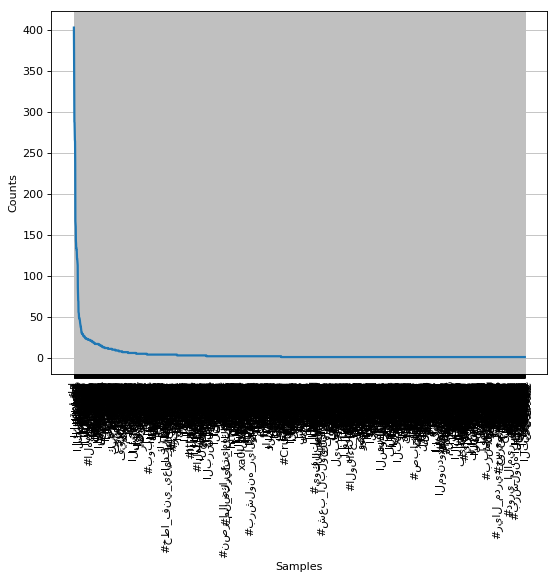

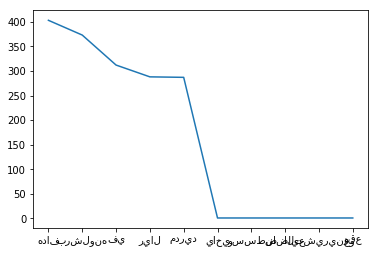

Most Common words : [('هداف', 403), ('برشلونه', 373), ('في', 312), ('ريال', 288), ('مدريد', 287), ('التاريخي', 272), ('5', 266), ('مرات', 264), ('من', 237), ('ميسي', 167)]
Least Common words [('يهودي', 1), ('اصبروا', 1), ('لين', 1), ('تشتري', 1), ('اريكسون', 1), ('ياخي', 1), ('وسسطنا', 1), ('ضضايع', 1), ('التشيرينغو', 1), ('وقع', 1)]


In [64]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

lstCnt=[]
lstLbl=[]
for t in fdist1.most_common(5):
    lstLbl.append(t[0])
    lstCnt.append(t[1])
for t in fdist1.most_common()[len(fdist1)-6:len(fdist1)-1]:
    lstLbl.append(t[0])
    lstCnt.append(t[1])

fdist1.plot()
plt.plot(lstLbl,lstCnt)
plt.show()
print("Most Common words : " + str(fdist1.most_common(10))
      + "\n" + "Least Common words "  + str(fdist1.most_common()[len(fdist1)-11:len(fdist1)-1]))

In [79]:
from nltk.collocations import *

all_tokens = []
tw = TweetTokenizer()
for i in range(len(tweets)):
    for token in tw.tokenize(tweets['Tweet'][i]):
        if('#' not in token and '@' not in token):
            all_tokens.append(token)
        
finder = BigramCollocationFinder.from_words(all_tokens)    
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [89]:
collacations = finder.nbest(bigram_measures.pmi,100)
collacations[50:70]

[('الاخيره', 'بتوفر'),
 ('الاساطير', 'بمختلف'),
 ('الاشخاص', 'الذ'),
 ('الاصابات', 'الرياضيه'),
 ('الاطفال', 'الذين'),
 ('الاطقم', 'الثلاثه'),
 ('الاغلب', 'اشاد'),
 ('الانتر', 'ذهاب'),
 ('الاوقات', 'السيءه'),
 ('البرشا', 'الاريحيه'),
 ('البيدج', 'فاهم'),
 ('التجارب', 'العلميه'),
 ('التخطيط', 'للسفر'),
 ('التزاوج', 'انجاب'),
 ('التصميم', 'الواحد'),
 ('التعامل', 'السليم'),
 ('التعليمات', 'لميسي'),
 ('التقرير', 'استمتعو'),
 ('التلفاز', 'وساستمتع'),
 ('التنس', 'فيدرر')]

In [98]:
all_tokens = []
tw = TweetTokenizer()
for i in range(len(tweets)):
    for token in tw.tokenize(tweets['Tweet'][i]):
        if '#' in token:
            all_tokens.append(token)
fdist2 = nltk.FreqDist(all_tokens)
fdist2.most_common(10)

[('#الهلال_الوحده', 22),
 ('#بوبي_روبسن', 4),
 ('#خطا_فني_يعيد_الكلاسيكو', 4),
 ('#ريال_مدريد', 4),
 ('#برشلونه', 4),
 ('#طقطقه', 3),
 ('#الكلاسيكو', 3),
 ('#الهلال_الاتحاد', 3),
 ('#الهلال', 3),
 ('#نصر_الاصرار_عزيمه_وانتصار', 2)]